<a href="https://colab.research.google.com/github/MarianaGCosta/MarianaGCosta/blob/main/CxG's%20applications%20to%20sentiment%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Evaluation:
## Construction Grammar's applications to sentiment analysis

**Author:** Mariana Gonçalves da Costa  /  **DRE:** 124063869 \

## Importação de Bibliotecas

In [ ]:
import re
import pandas as pd
import numpy as np
import os
import spacy
import nltk
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer  - Esse aqui só funciona para o inglês
from nltk.stem import SnowballStemmer

## Importação dos Conjuntos de Dados


Função para baixar os conjuntos de dados da internet e colocá-los em pastas no Colab.

In [ ]:
# Função que baixa conjuntos de dados da internet e os aloca em pastas no Colab.
#
# Recebe: uma lista com os links de download; o nome escolhido para a pasta raiz
# no Colab, onde serão postas as bases de dados; e os respectivos nomes escolhidos
# para essas bases a serem baixadas.
#
# Retorna: os caminhos para as pastas das bases de dados no Colab.

def baixa_conjuntos(links, nome_pasta_raiz, nomes_bases):
  if(not links):
    print("Nada a importar!")
    return None

  if(type(nome_pasta_raiz) != str or nome_pasta_raiz == ""):
    print("Por favor, informe o nome da pasta mestre!")
    return None

  if(len(links) != len(nomes_bases)):
    print("A quantidade de links e de nomes das bases de dados deve ser a mesma.")
    return None

  for i in range(len(links)):
    if(type(links[i]) != str or links[i] == ""):
      print("Os links devem ser strings não vazias.")
      return None

    if(type(nomes_bases[i]) != str or nomes_bases[i] == ""):
      print("Os nomes das bases devem ser strings não vazias.")
      return None

  caminho_raiz = "/content/" + nome_pasta_raiz
  caminhos = []


  os.system("mkdir " + caminho_raiz)

  for i in range(len(links)):
    os.system("wget --no-check-certificate " + links[i])

    pasta_zip = links[i].split("/")[-1]
    os.system("unzip /content/" + pasta_zip + " -d /content/")

    nome_pasta_zip = pasta_zip.split(".zip")[0]
    caminhos.append(caminho_raiz + "/" + nomes_bases[i])
    os.system("mv /content/" + nome_pasta_zip + " " + caminhos[i])

    os.system("rm -rf /content/" + pasta_zip)

  return caminhos

In [ ]:
# Função que abre conjuntos de dados zipados em memória e os aloca em pastas no Colab.
#
# Recebe: uma lista com os nomes dos arquivos.zip; o nome escolhido para a pasta raiz
# no Colab, onde serão postas as bases de dados; e os respectivos nomes escolhidos
# para essas bases a serem baixadas.
#
# Retorna: os caminhos para as pastas das bases de dados no Colab.

def abre_conjuntos(nomes_zips, nome_pasta_raiz, nomes_bases):

  if(type(nome_pasta_raiz) != str or nome_pasta_raiz == ""):
    print("Por favor, informe o nome da pasta mestre!")
    return None

  if(len(links) != len(nomes_bases)):
    print("A quantidade de links e de nomes das bases de dados deve ser a mesma.")
    return None

    if(type(nomes_bases[i]) != str or nomes_bases[i] == ""):
      print("Os nomes das bases devem ser strings não vazias.")
      return None

  caminho_raiz = "/content/" + nome_pasta_raiz
  caminhos = []


  os.system("mkdir " + caminho_raiz)

  for i in range(len(nomes_zips)):

    pasta_zip = nomes_zips[i]
    os.system("unzip /content/" + pasta_zip + " -d /content/")

    nome_pasta_zip = pasta_zip.split(".zip")[0]
    caminhos.append(caminho_raiz + "/" + nomes_bases[i])
    os.system("mv /content/" + nome_pasta_zip + " " + caminhos[i])

    os.system("rm -rf /content/" + pasta_zip)

  return caminhos

Função que importa um conjunto de documentos das pastas do Colab para que possam ser trabalhados em python.

In [ ]:
# Função que importa, para o python, uma base de dados (conjunto de documentos).
#
# Recebe: caminho para a pasta que contém os documentos da base da dados.
#
# Retorna: uma lista em que cada elemento é um documento da base (string), além
# de uma outra lista com os nomes dos documentos.
def importa_base(pasta):
  documentos = []
  nome_documentos = []

  for arquivo in os.listdir(pasta):
    if arquivo.endswith(".txt"):
      with open(os.path.join(pasta, arquivo), 'r') as f:
        documentos.append(f.read())
        nome_documentos.append(arquivo.split(".txt")[0])

  return documentos, nome_documentos

Baixando as bases de dados especificadas na questão:

In [ ]:
nome_raiz = "BasesDados"

links = [
    "https://dcc.ufrj.br/~giseli/recinfo/dataset1.zip",
    "https://dcc.ufrj.br/~giseli/recinfo/dataset2.zip"
]

zips = [
    "dataset1.zip",
    "dataset2.zip"
]

nomes_bases = ["Base1", "Base2"]

# caminhos = baixa_conjuntos(links, nome_raiz, nomes_bases)
caminhos = abre_conjuntos(zips, nome_raiz, nomes_bases)

Importando as bases para que possam ser utilizadas em um ambiente python:

In [ ]:
bases = []
documentos_bases = []

# Para cada pasta das bases, extrai os documentos e pega seus respectivos nomes
for pasta in caminhos:
  documentos = pasta + "/documentos"
  documentos_extraidos, nomes_doc_extraidos = importa_base(documentos)
  bases.append(documentos_extraidos)
  documentos_bases.append(nomes_doc_extraidos)


# Apenas mostra as bases (conteúdo dos documentos e seus nomes)
for i in range(len(bases)):
  print("Base " + str(i + 1) + ":")
  print(bases[i])
  print(documentos_bases[i])
  print()

Base 1:
['O peão e o cavalo são peças de xadrez. O cavalo é o melhor do jogo.', 'Policiais o jogaram no xadrez.', 'O peão laçou o boi', 'Cavalo de rodeio!', 'A jogada envolve a torre, o peão e o rei.']
['doc1', 'doc5', 'doc3', 'doc4', 'doc2']

Base 2:
['Seleção brasileira vai observar de 35 a 40 jogadores para definir lista da Copa América', 'Parasita é o grande vencedor do Oscar 2020, com quatro prêmios', 'Arrascaeta e Matías Viña são convocados pelo Uruguai para eliminatórias da Copa. Além deles, há outros destaques na lista.', 'Estatísticas. Brasileirão Série A: Os artilheiros e garçons da temporada 2020', 'Conheça os indicados ao Oscar 2020; Cerimônia de premiação acontece em fevereiro', 'Oscar do Vinho: confira os rótulos de destaque da safra 2018', 'Bem, Amigos! discute lista da Seleção, e Galvão dá recado a Tite: Cadê o Luan?', 'Oscar Schmidt receberá Troféu no Prêmio Brasil Olímpico 2019. Jogador de basquete com mais pontos em Jogos Olímpicos.', 'Oscar 2020: Confira lista compl

## Definição dos Separadores, Consultas e Stopwords

Função que importa arquivos para que possam ser trabalhados em python.

In [ ]:
# Função para importação de arquivos das pastas do Colab.
#
# Recebe: caminhos das pastas das bases de dados e um nome de arquivo.
#
# Retorna: um conjunto de arquivos importados (são todos strings).

def importa_arquivos(caminhos, arquivo):
  importados = []

  for pasta in caminhos:
    with open(os.path.join(pasta, arquivo), 'r') as f:
      importados.append(f.read())

  return importados

Função que mostra o conteúdo de listas referentes às bases de dados.

In [ ]:
# Função para "printar" informações de uma lista.
#
# Recebe: uma lista de elementos e o nome da lista.
#
# Retorna: nada, apenas "escreve na tela".

def mostra(lista, nome_lista):
  for i in range(len(lista)):
    print(nome_lista + " da Base " + str(i + 1) + ":")
    print(lista[i])
    print()

Com base nos arquivos fornecidos, ocorre a definição dos caracteres separadores de cada base de dados:

In [ ]:
separadores = importa_arquivos(caminhos, "separadores.txt")
mostra(separadores, "Separadores")

Separadores da Base 1:
 
,
.
!
?

Separadores da Base 2:
 
,
.
!
?
:
;
/



Com base nos arquivos fornecidos, são definidas as consultas para cada base de dados:

In [ ]:
consultas = importa_arquivos(caminhos, "consulta.txt")
mostra(consultas, "Consultas")

Consultas da Base 1:
xadrez peão cavalo torre

Consultas da Base 2:
oscar 2020



Define as stopwords a partir da lista da nltk:

In [ ]:
nltk.download('stopwords')

stopwords = [set(nltk.corpus.stopwords.words('portuguese')), None]
stopwords[1] = stopwords[0]

stopwords[1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

## Pré-processamento

### Tokenização

Função responsável por realizar a etapa de tokenização, ou seja, de extração de palavras a partir do texto.

In [ ]:
# Essa função encontra as palavras de um texto com base nos separadores passados.
#
# Recebe: um texto e um conjunto de separadores (caracteres).
#
# Retorna: Uma lista de palavras (strings).

def tokenizacao(texto, separadores):
  # Cria uma lista com os separadores, que estavam cada um em uma linha
  caracteres = separadores.splitlines()

  # Elimina elementos vazios da lista de caracteres
  caracteres = list(filter(None, caracteres))

  # Cria um dicionário com as substituições que precisarão ser feitas na string
  trocar = {}

  for c in caracteres:
    trocar.update(texto.maketrans(c, " "))

  # Realiza as substituições (por espaço) e quebra a string em uma lista de tokens
  tokens = texto.translate(trocar).split()

  return tokens

### Normalização

Função responsável pela etapa de normalização. Nesse caso, as palavras apenas são deixadas em minúsculo.

In [ ]:
# Função que normaliza as palavras, deixando-as em caixa baixa.
#
# Recebe: uma lista de palavras (string).
#
# Retorna: uma lista de palavras normalizada (string).

def normalizacao(palavras):
  for i in range(len(palavras)):
    palavras[i] = palavras[i].lower()

  return palavras

### Eliminação de Stopwords

Função responsável pela etapa de eliminação de stopwords, que são aquelas palavras que aparecem com frequência em uma língua.

In [ ]:
# Função que elimina palavras muito frequentes da lista recebida.
#
# Recebe: uma lista de palavras (string) e um set de stopwords.
#
# Retorna: a lista de palavras recebida sem as palavras que aparecem no set (são
# stopwords).

def elimina_stopwords(palavras, stopwords):
  nova_lista = []

  for palavra in palavras:
    if(palavra not in stopwords):
      nova_lista.append(palavra)

  return nova_lista

### Stemming

Função responsável pela etapa de stemming, em que se retira os afixos das palavras. O stemmer utilizado é o Snowball para a língua portuguesa.

In [ ]:
# Função que realiza o stemming de uma lista de palavras (em português).
#
# Recebe: uma lista de palavras (string).
#
# Retorna: a lista de palavras após passar pelo processo de stemming (do Snowball).

def stemming(palavras):
  stemmer = SnowballStemmer("portuguese")

  for i in range(len(palavras)):
    palavras[i] = stemmer.stem(palavras[i])

  return palavras

### Pré-processando

Ao juntar todas as etapas descritas anteriormente, completamos o pré-processamento.

In [ ]:
# Função que realiza o pré-processamento de um arquivo, seja consulta ou documento.
#
# Recebe: um arquivo textual; uma lista de caracteres separadores; e uma lista
# de stopwords.
#
# Retorna: uma lista de palavras pré-processadas referentes ao arquivo passado.

def pre_processamento(arquivo, separadores, stopwords):
  tokens = tokenizacao(arquivo, separadores)

  tokens_normais = normalizacao(tokens)

  tokens_eliminacao = elimina_stopwords(tokens_normais, stopwords)

  tokens_pre_processados = stemming(tokens_eliminacao)

  return tokens_pre_processados

Pré-processamento dos documentos e consultas:

In [ ]:
import copy

# Faz uma cópia das bases e das consultas para não perder os documentos e consultas originais
bases_processadas = copy.deepcopy(bases)
consultas_processadas = copy.deepcopy(consultas)


for i in range(len(bases)):
  print("Pré-processamento da Base " + str(i+1) + ":")

  for j in range(len(bases[i])):
    bases_processadas[i][j] = pre_processamento(bases[i][j], separadores[i], stopwords[i])
    print("Documento " + str(j+1) + " (" + documentos_bases[i][j] + ".txt): " + str(bases_processadas[i][j]))

  print()


for i in range(len(consultas)):
  consultas_processadas[i] = pre_processamento(consultas[i], separadores[i], stopwords[i])
  print("Pré-processamento da Consulta " + str(i+1) + ": " + str(consultas_processadas[i]))

Pré-processamento da Base 1:
Documento 1 (doc1.txt): ['peã', 'caval', 'pec', 'xadrez', 'caval', 'melhor', 'jog']
Documento 2 (doc5.txt): ['polic', 'jog', 'xadrez']
Documento 3 (doc3.txt): ['peã', 'lac', 'boi']
Documento 4 (doc4.txt): ['caval', 'rodei']
Documento 5 (doc2.txt): ['jog', 'envolv', 'torr', 'peã', 'rei']

Pré-processamento da Base 2:
Documento 1 (doc7.txt): ['seleçã', 'brasileir', 'vai', 'observ', '35', '40', 'jogador', 'defin', 'list', 'cop', 'amér']
Documento 2 (doc1.txt): ['parasit', 'grand', 'vencedor', 'oscar', '2020', 'quatr', 'prêmi']
Documento 3 (doc11.txt): ['arrascaet', 'matí', 'viñ', 'convoc', 'urugua', 'eliminatór', 'cop', 'além', 'outr', 'destaqu', 'list']
Documento 4 (doc14.txt): ['estatíst', 'brasil', 'séri', 'artilheir', 'garçons', 'tempor', '2020']
Documento 5 (doc5.txt): ['conhec', 'indic', 'oscar', '2020', 'cerimôn', 'premiaçã', 'acontec', 'fevereir']
Documento 6 (doc12.txt): ['oscar', 'vinh', 'conf', 'rótul', 'destaqu', 'safr', '2018']
Documento 7 (doc9.t

## Criação de uma Estrutura de Indexação

Função responsável pela criação de uma matriz de incidências, estrutura de indexação que apoiará a recuperação da informação (no próximo trabalho).

In [ ]:
# Função que gera a matriz de incidências de uma base de dados.
# Vale ressaltar que essa é uma "variante": a matriz registra a quantidade de
# vezes que uma palavra aparece em um documento.
#
# Recebe: um conjunto de documentos que passou pela fase de pré-processamento.
#
# Retorna: a matriz de incidências referente ao conjunto.

def cria_matriz_incidencia(base_processada):
  tokens = {}
  quant_doc = len(base_processada)

  for i in range(quant_doc):
    for palavra in base_processada[i]:
      if palavra not in tokens:
        tokens[palavra] = [0]*quant_doc

      tokens[palavra][i] += 1


  matriz_incid = pd.DataFrame(tokens).transpose()

  return matriz_incid

Gerando as matrizes de incidência para cada base e as exibindo na tela:

In [ ]:
matriz_incid = []

for i in range(len(bases_processadas)):
  matriz = cria_matriz_incidencia(bases_processadas[i])
  matriz_incid.append(matriz)
  matriz_incid[i].columns = documentos_bases[i]

  print("Matriz de Incidências da Base " + str(i+1) + ":\n")
  display(matriz_incid[i])
  print()

Matriz de Incidências da Base 1:



,doc1,doc5,doc3,doc4,doc2
peã,1,0,1,0,1
caval,2,0,0,1,0
pec,1,0,0,0,0
xadrez,1,1,0,0,0
melhor,1,0,0,0,0
jog,1,1,0,0,1
polic,0,1,0,0,0
lac,0,0,1,0,0
boi,0,0,1,0,0
rodei,0,0,0,1,0



Matriz de Incidências da Base 2:



,doc7,doc1,doc11,doc14,doc5,doc12,doc9,doc6,doc3,doc15,doc4,doc13,doc8,doc10,doc2
seleçã,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
brasileir,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
vai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
observ,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
book,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
rom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
bohemian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
rhapsody,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Modelo Probabilístico (BM25)

Implementação do modelo BM25 a partir da seguinte formulação:
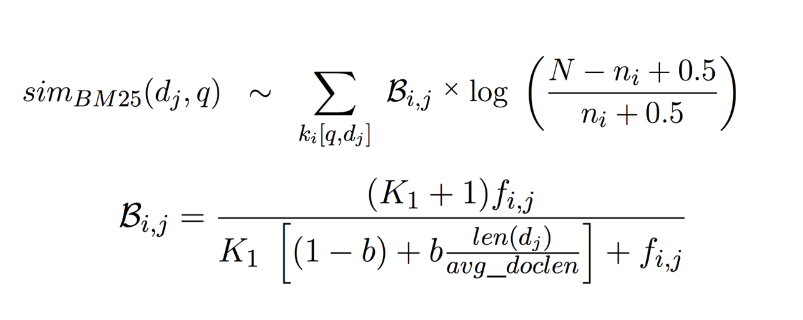

### Average Length per Doc

In [ ]:
def avgdoclen(matriz_incid):
  # Função que calcula a média do tamanho dos documentos
  # presentes na matriz de incidência
  #
  # Recebe: uma matriz de ocorrências
  #
  # Retorna: a média do tamanho dos documentos da matriz

  avg_doc_len = []

  for documento in matriz_incid.columns:
    avg_doc_len.append(sum(matriz_incid[documento].astype(float)))

  return sum(avg_doc_len) / len(avg_doc_len)

### Cálculo $B_{i,j}$

In [ ]:
def calculoBij(matriz_incid, tamanho_estimado, documento, termo, k1 = 1, b = 0.75):
  freq_termo = matriz_incid.loc[termo][documento]
  tamanho_doc = sum(matriz_incid[documento].astype(float))

  Bij = ((k1 + 1) * freq_termo) / (k1 * ((1-b) + b * (tamanho_doc/tamanho_estimado)) + freq_termo)

  return Bij


In [ ]:
# Função que conta quantos elementos não nulos existem em uma matriz
#
# Recebe: uma matriz de ocorrências
#
# Retorna: a quantidade de termos não nulos nos documentos da matriz

def doc_com_termo(matriz_incid, termo):
  n_i = .0

  for documento in matriz_incid.columns:
    if(matriz_incid.loc[termo][documento] != 0):
      n_i += 1

  return n_i

In [ ]:
import math

def BM25(matriz_incid, documento, consulta, k1 = 1, b = 0.75):
  num_doc = len(matriz_incid.columns)
  simBM25 = .0
  tamanho_estimado = avgdoclen(matriz_incid)

  for termo in consulta:
    if termo not in matriz_incid.index:
      continue

    Bij = calculoBij(matriz_incid, tamanho_estimado, documento, termo, k1, b)
    if Bij == 0:
      continue

    n_i = doc_com_termo(matriz_incid, termo)
    simBM25 += Bij * math.log((num_doc - n_i + 0.5)/(n_i + 0.5))

  return simBM25

In [ ]:
# len([f for f in matriz_incid[0].loc['caval'] if f > 0])

##Ranking final dos documentos

In [ ]:
def ranking(similaridade):
  sim_ordenada = sorted(similaridade.items(), key=lambda x: x[1], reverse=True)
  placar = pd.DataFrame(sim_ordenada, columns =['Documento', 'Similaridade'])
  placar.index += 1

  return placar

### Cálculo da Similaridade entre os termos escolhidos e documentos

In [ ]:
similaridades_consultas = []

for i in range(len(matriz_incid)):
  similar_documentos = {}

  for documento in matriz_incid[i].columns:
    similar_documentos[documento] = BM25(matriz_incid[i], documento, consultas_processadas[i])

  similaridades_consultas.append(pd.Series(similar_documentos))
  display(ranking(similaridades_consultas[i]))

,Documento,Similaridade
1,doc2,0.696814
2,doc4,0.414120
3,doc1,0.377793
4,doc5,0.371280
5,doc3,-0.371280


,Documento,Similaridade
1,doc14,0.412017
2,doc15,0.377362
3,doc8,0.289415
4,doc1,0.276126
5,doc5,0.264003
6,doc3,0.233279
7,doc7,0.000000
8,doc11,0.000000
9,doc9,0.000000
10,doc13,0.000000


## Ponderação de Termos (TF-IDF)

Implementação da ponderação TF-IDF para atribuição dos pesos dos termos a partir do 3° esquema de ponderação sugerido por [Salton, 1971]

In [ ]:
import math

# Função que calcula o TF-IDF usando o esquema sugerido pelo Salton (1971)
#
# Recebe: a frequência de um termo, o número de documentos da base e a quantidade
# de documentos em que o termo ocorre
#
# Retorna: o cálculo do TF-IDF
def TF_IDF_3(freq_termo, num_documentos, num_doc_com_termo):
  if(freq_termo == 0 or num_doc_com_termo == 0):
    return 0

  return (1 + math.log(freq_termo, 2)) * math.log(num_documentos / num_doc_com_termo, 2)


Procedimento de ponderação TF-IDF para atribuir pesos aos termos:

In [ ]:
# Função que conta quantos elementos não nulos existem em uma lista
#
# Recebe: uma lista numérica
#
# Retorna: a quantidade de termos não nulos da lista
def conta_ocorrencias_em_doc(lista):
  soma = 0

  for x in lista:
    if(x != 0):
      soma += 1

  return soma

In [ ]:
# Função que gera uma matriz com a ponderação (pesos) de cada termo em seus
# respectivos documentos da base ou em sua consulta.
#
# Recebe: a matriz de incidências do conjunto de documentos e (opcionalmente) a
# matriz de incidências da consulta.
#
# Retorna: a matriz com as ponderações para os termos na base ou na consulta.
def gera_ponderacao(matriz_incid_base, matriz_incid_consulta = None):
  num_documentos = len(matriz_incid_base.columns)

  if(matriz_incid_consulta is not None):
    ponderacao = matriz_incid_consulta.copy().astype(float)
    termos = matriz_incid_consulta.index
  else:
    ponderacao = matriz_incid_base.copy().astype(float)
    termos = matriz_incid_base.index

  conj_termos_base = set(matriz_incid_base.index)


  for token in termos:
    if(token in conj_termos_base):
      quant_em_doc = matriz_incid_base.loc[token].values.tolist()
      num_doc_com_termo = conta_ocorrencias_em_doc(quant_em_doc)
    else:
      num_doc_com_termo = 0

    for documento in ponderacao.columns:
      if(matriz_incid_consulta is not None):
        freq_termo = matriz_incid_consulta.loc[token][documento]
      else:
        freq_termo = matriz_incid_base.loc[token][documento]

      tf_idf = TF_IDF_3(freq_termo, num_documentos, num_doc_com_termo)
      ponderacao.loc[token][documento] = tf_idf


  return ponderacao

Criando as ponderações para os termos de cada base, assim como as ponderações para as consultas:

In [ ]:
# Gerando as ponderações para os termos das bases
ponderacao_bases = []

for i in range(len(matriz_incid)):
  matriz_incid[i].columns = documentos_bases[i]
  pond = gera_ponderacao(matriz_incid[i])
  ponderacao_bases.append(pond)
  print("Ponderação dos termos da Base " + str(i+1) + ":")
  display(ponderacao_bases[i])
  print()


# Gerando as matrizes de incidência das consultas
matriz_incid_consultas = []

for i in range(len(consultas_processadas)):
  mat_incid = cria_matriz_incidencia([consultas_processadas[i]])
  matriz_incid_consultas.append(mat_incid)


# Gerando as ponderações para os termos das consultas
ponderacao_consultas = []

for i in range(len(matriz_incid_consultas)):
  pond = gera_ponderacao(matriz_incid[i], matriz_incid_consultas[i])
  ponderacao_consultas.append(pond)
  print("Ponderação dos termos da Consulta da Base " + str(i+1) + ":")
  display(ponderacao_consultas[i])
  print()

Ponderação dos termos da Base 1:


<ipython-input-77-276fbd6f2c20>:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ponderacao.loc[token][documento] = tf_idf


,doc1,doc5,doc3,doc4,doc2
peã,0.736966,0.000000,0.736966,0.000000,0.736966
caval,2.643856,0.000000,0.000000,1.321928,0.000000
pec,2.321928,0.000000,0.000000,0.000000,0.000000
xadrez,1.321928,1.321928,0.000000,0.000000,0.000000
melhor,2.321928,0.000000,0.000000,0.000000,0.000000
jog,0.736966,0.736966,0.000000,0.000000,0.736966
polic,0.000000,2.321928,0.000000,0.000000,0.000000
lac,0.000000,0.000000,2.321928,0.000000,0.000000
boi,0.000000,0.000000,2.321928,0.000000,0.000000
rodei,0.000000,0.000000,0.000000,2.321928,0.000000


<ipython-input-77-276fbd6f2c20>:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ponderacao.loc[token][documento] = tf_idf



Ponderação dos termos da Base 2:


,doc7,doc1,doc11,doc14,doc5,doc12,doc9,doc6,doc3,doc15,doc4,doc13,doc8,doc10,doc2
seleçã,2.906891,0.0,0.0,0.0,0.0,0.0,2.906891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
brasileir,3.906891,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
vai,3.906891,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
observ,3.906891,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
35,3.906891,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
book,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.906891
rom,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.906891
bohemian,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.906891
rhapsody,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.906891



Ponderação dos termos da Consulta da Base 1:


<ipython-input-77-276fbd6f2c20>:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ponderacao.loc[token][documento] = tf_idf


,0
xadrez,1.321928
peã,0.736966
caval,1.321928
torr,2.321928



Ponderação dos termos da Consulta da Base 2:


<ipython-input-77-276fbd6f2c20>:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ponderacao.loc[token][documento] = tf_idf


,0
oscar,0.906891
2020,1.321928


## Modelo Vetorial

### Criação do Modelo Vetorial

In [ ]:
# Função que calcula a similaridade entre dois vetores por meio do cosseno.
#
# Recebe: dois vetores (numpy arrays).
#
# Retorna: valor do cosseno entre os dois vetores.
def similaridade_cosseno(vetor1, vetor2):
  cosseno = np.dot(vetor1, vetor2) / (np.linalg.norm(vetor1) * np.linalg.norm(vetor2))
  return cosseno

In [ ]:
# Função que calcula o grau de similaridade entre os documentos da base e uma
# consulta.
#
# Recebe: as ponderações dos termos da base e da consulta.
#
# Retorna: um dicionário com a similaridade dos documentos (em relação à consulta)
def modelo_vetorial(ponderacao_base, ponderacao_consulta):
  # Gera o vetor da consulta na mesma dimensão do vetor de um documento
  quant_termos = len(ponderacao_base.index)
  vetor_consulta = np.array([.0] * quant_termos)
  conj_termos_consulta = set(ponderacao_consulta.index)

  for i in range(len(ponderacao_base.index)):
    termo = ponderacao_base.index[i]

    if(termo in conj_termos_consulta):
      vetor_consulta[i] = ponderacao_consulta.loc[termo][0]


  # Computa o grau de similaridade entre cada documento e a consulta
  similaridade = {}

  for documento in ponderacao_base.columns:
    vetor_documento = ponderacao_base[documento].to_numpy()
    cosseno = similaridade_cosseno(vetor_documento, vetor_consulta)
    similaridade[documento] = cosseno

  return similaridade

### Ranking Final dos Documentos para uma Consulta

In [ ]:
# Função que gera o ranqueamento dos documentos com base em sua similaridade com
# uma consulta.
#
# Recebe: um dicionário com a similaridade dos documentos (em relação à consulta).
#
# Retorna: um dataframe ordenado a partir da similaridade dos documentos.
def ranking(similaridade):
  sim_ordenada = sorted(similaridade.items(), key=lambda x: x[1], reverse=True)
  placar = pd.DataFrame(sim_ordenada, columns =['Documento', 'Similaridade'])
  placar.index += 1

  return placar

### Processamento das Consultas no Modelo Vetorial

In [ ]:
for i in range(len(ponderacao_consultas)):
  correlacao = modelo_vetorial(ponderacao_bases[i], ponderacao_consultas[i])
  placar = ranking(correlacao)

  print("Resultado da Consulta da Base " + str(i+1) + ":")
  display(placar)
  print("\n")

Resultado da Consulta da Base 1:


,Documento,Similaridade
1,doc2,0.465173
2,doc1,0.415053
3,doc4,0.212990
4,doc5,0.205322
5,doc3,0.052555




Resultado da Consulta da Base 2:


,Documento,Similaridade
1,doc1,0.242335
2,doc8,0.200978
3,doc3,0.174239
4,doc5,0.165213
5,doc14,0.122100
6,doc15,0.105296
7,doc12,0.058958
8,doc4,0.053786
9,doc2,0.050189
10,doc6,0.038192


## Avaliação da Recuperação

**Rascunho** \
Recall = |R ∩ A|/|R|   \
Precision = |R ∩ A|/|A|   \
Sejam Rq1 e Rq2 os conjuntos de documentos relevantes para as consultas q1 e q2, respectivamente:
- Rq1 = {d3, d5, d9}
- Rq2 = {d1, d2, d6, d9}

Sabendo quais são os documentos relevantes para uma
consulta (R), calcule as métricas de avaliação a seguir para
os modelos vetorial e BM25, implementados nas aulas
anteriores (considere que seriam recuperados apenas os documentos com
similaridades positivas)

Importando os documentos relevantes

In [ ]:
recuperacao_vetorial = []

for i in range(len(ponderacao_consultas)):
    correlacao = modelo_vetorial(ponderacao_bases[i], ponderacao_consultas[i])

    recuperados = []

    for key, value in correlacao.items():
        if value > 0:
            recuperados.append(key)

    recuperacao_vetorial.append(recuperados)

recuperacao_vetorial

[['doc1', 'doc5', 'doc3', 'doc4', 'doc2'],
 ['doc1',
  'doc14',
  'doc5',
  'doc12',
  'doc6',
  'doc3',
  'doc15',
  'doc4',
  'doc8',
  'doc2']]

In [ ]:
recuperacao_probabilistica = []

for consulta in similaridades_consultas:
    rec_prob = []

    for key, value in consulta.items():
        if value > 0:
            rec_prob.append(key)

    recuperacao_probabilistica.append(rec_prob)

recuperacao_probabilistica

[['doc1', 'doc5', 'doc4', 'doc2'],
 ['doc1', 'doc14', 'doc5', 'doc3', 'doc15', 'doc8']]

In [ ]:
relevantes = importa_arquivos(caminhos, "relevantes.txt")

relevantes = [r.split('\n') for r in relevantes]

recuperados = []
recuperados = {
    'probabilistico' : recuperacao_probabilistica,
    'vetorial' : recuperacao_vetorial
}

In [ ]:
relevantes

[['doc1', 'doc2'], ['doc1', 'doc3', 'doc5', 'doc8']]

In [ ]:
recuperados

{'probabilistico': [['doc1', 'doc5', 'doc4', 'doc2'],
  ['doc1', 'doc14', 'doc5', 'doc3', 'doc15', 'doc8']],
 'vetorial': [['doc1', 'doc5', 'doc3', 'doc4', 'doc2'],
  ['doc1',
   'doc14',
   'doc5',
   'doc12',
   'doc6',
   'doc3',
   'doc15',
   'doc4',
   'doc8',
   'doc2']]}

### Precisão e Revocação

In [ ]:
def calculo_recall(recuperados, relevantes):
  if len(relevantes) == 0:
    return 0
  recall = len(set(recuperados) & set(relevantes))/len(relevantes)
  return recall

def calculo_precisao(recuperados, relevantes):
  if len(recuperados) == 0:
    return 0
  precisao = len(set(recuperados) & set(relevantes))/len(recuperados)
  return precisao

In [ ]:
def precisao_recall(recuperados, relevantes):

    precisao_recall = {
        'recall': [],
        'precisao': []
    }

    precisao_recall_index = []

    for k in range(0, len(recuperados)):

        if recuperados[k] in relevantes:

            precisao = calculo_precisao(
                recuperados[:k+1] if k < len(recuperados)-1
                else recuperados,
                relevantes
            )

            recall = calculo_recall(
                recuperados[:k+1] if k < len(recuperados)-1
                else recuperados,
                relevantes
            )

            precisao_recall['precisao'].append(round(precisao, ndigits = 2))

            precisao_recall['recall'].append(round(recall, ndigits = 2))

            precisao_recall_index.append(recuperados[k])

    precisao_recall = pd.DataFrame(precisao_recall, index = precisao_recall_index)

    return precisao_recall

### Testando com exemplos do slide
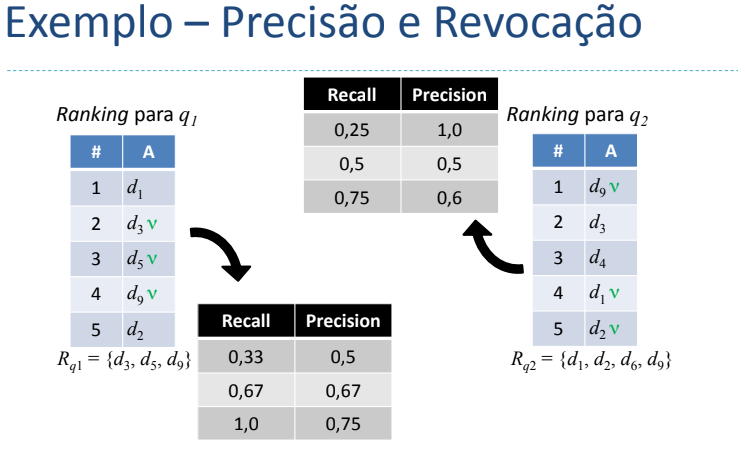

In [ ]:
pr_test = precisao_recall(
    recuperados = ['d9', 'd3', 'd4', 'd1', 'd2'],
    relevantes = ['d1', 'd2', 'd6', 'd9']
)

display(pr_test)

,recall,precisao
d9,0.25,1.0
d1,0.50,0.5
d2,0.75,0.6


#### Resultado final (precisão e revocação)

In [ ]:
for modelo, recuperados_modelo in recuperados.items():

    print(f'Modelo {modelo}:')

    num_consulta = 1

    for recuperado, relevante in zip(recuperados_modelo, relevantes):

        print(f'Consulta {num_consulta}')

        display(precisao_recall(recuperado, relevante))

        num_consulta += 1

Modelo probabilistico:
Consulta 1


,recall,precisao
doc1,0.5,1.0
doc2,1.0,0.5


Consulta 2


,recall,precisao
doc1,0.25,1.00
doc5,0.50,0.67
doc3,0.75,0.75
doc8,1.00,0.67


Modelo vetorial:
Consulta 1


,recall,precisao
doc1,0.5,1.0
doc2,1.0,0.4


Consulta 2


,recall,precisao
doc1,0.25,1.00
doc5,0.50,0.67
doc3,0.75,0.50
doc8,1.00,0.44


### Precisão interpolada

In [ ]:
def precisao_interpolada(precisao_recall):

    niveis_recall = {
        'recall': [],
        'precisao': []
    }

    nivel_recall = 0.0

    while nivel_recall <= 1.0:

        niveis_recall['recall'].append(nivel_recall)

        niveis_recall['precisao'].append(
            max(
                list(
                    precisao_recall.loc[
                        precisao_recall['recall'] >= nivel_recall
                    ]['precisao']
                ) + [0]
            )
        )

        nivel_recall = round(nivel_recall + 0.1, ndigits = 1)

    niveis_recall = pd.DataFrame(niveis_recall)

    return niveis_recall

#### Testando com exemplo do slide
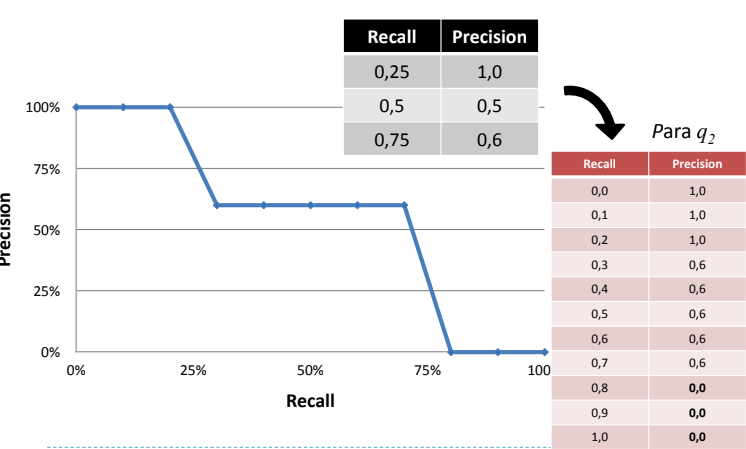

In [ ]:
display(precisao_interpolada(pr_test))

,recall,precisao
d9,0.25,1.0
d1,0.50,0.5
d2,0.75,0.6


,recall,precisao
0,0.0,1.0
1,0.1,1.0
2,0.2,1.0
3,0.3,0.6
4,0.4,0.6
5,0.5,0.6
6,0.6,0.6
7,0.7,0.6
8,0.8,0.0
9,0.9,0.0


In [ ]:
def precisoes_interpoladas(lista_recuperados, lista_relevantes):

    # relevantes = [doc1, doc2]
    # recuperados = vetorial: [doc3, doc4, doc1]

    precisoes_por_modelo = {}

    for modelo, lista_recuperados_modelo in lista_recuperados.items():

        precisoes_modelo = []

        for recuperados, relevantes in zip(lista_recuperados_modelo, lista_relevantes):

            prec_recall = precisao_recall(recuperados, relevantes)

            precisoes_modelo.append(precisao_interpolada(prec_recall))

        precisoes_por_modelo[modelo] = precisoes_modelo

    return precisoes_por_modelo

#### Resultado final para precisão interpolada

In [ ]:
precisoes_inter = precisoes_interpoladas(recuperados, relevantes)

for modelo, precisao_inter in precisoes_inter.items():
    print(f"Modelo {modelo}")

    for i in range(len(precisao_inter)):

        print(f"Consulta número {i+1}")

        display(precisao_inter[i])

Modelo probabilistico
Consulta número 1


,precisao,recall
0,1.0,0.0
1,1.0,0.1
2,1.0,0.2
3,1.0,0.3
4,1.0,0.4
5,1.0,0.5
6,0.5,0.6
7,0.5,0.7
8,0.5,0.8
9,0.5,0.9


Consulta número 2


,precisao,recall
0,1.00,0.0
1,1.00,0.1
2,1.00,0.2
3,0.75,0.3
4,0.75,0.4
5,0.75,0.5
6,0.75,0.6
7,0.75,0.7
8,0.67,0.8
9,0.67,0.9


Modelo vetorial
Consulta número 1


,precisao,recall
0,1.0,0.0
1,1.0,0.1
2,1.0,0.2
3,1.0,0.3
4,1.0,0.4
5,1.0,0.5
6,0.4,0.6
7,0.4,0.7
8,0.4,0.8
9,0.4,0.9


Consulta número 2


,precisao,recall
0,1.00,0.0
1,1.00,0.1
2,1.00,0.2
3,0.67,0.3
4,0.67,0.4
5,0.67,0.5
6,0.50,0.6
7,0.50,0.7
8,0.44,0.8
9,0.44,0.9


### Precisão média para a consulta ($MAP_i$)

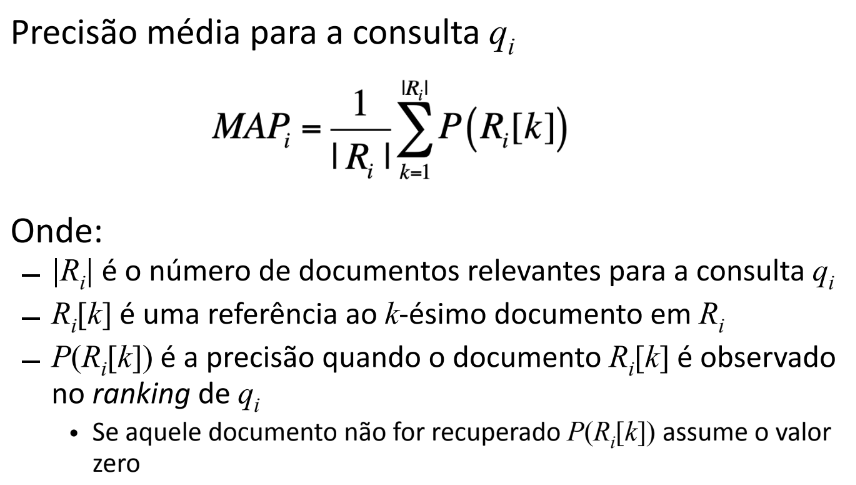

In [ ]:
def precisao_map_i_modelo(recuperados, relevantes):

    if not relevantes:
        return 0

    sum_precisao = 0

    count_docs_relevantes = 0

    for k in recuperados:

        if k in relevantes:

            count_docs_relevantes += 1

            precisao_doc = count_docs_relevantes / (recuperados.index(k)+1)

            sum_precisao += precisao_doc

    return sum_precisao/len(relevantes)

#### Testando com exemplo do slide
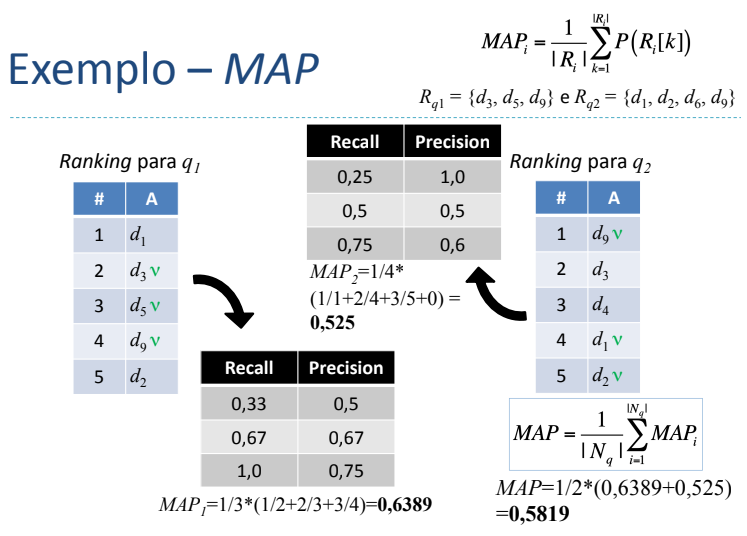

In [ ]:
print(
    precisao_map_i_modelo(
        recuperados = ['d1', 'd3', 'd5', 'd9', 'd2'],
        relevantes = ['d3', 'd5', 'd9']
    )
)

print(
    precisao_map_i_modelo(
        recuperados = ['d9', 'd3', 'd4', 'd1', 'd2'],
        relevantes = ['d1', 'd2', 'd6', 'd9']
    )
)

0.6388888888888888
0.525


#### Resultado final para $MAP_i$

In [ ]:
def precisoes_map_i(lista_recuperados, lista_relevantes):

    # relevantes = [doc1, doc2]
    # recuperados = vetorial: [doc3, doc4, doc1]

    precisoes_por_modelo = {}

    for modelo, lista_recuperados_modelo in lista_recuperados.items():

        precisoes_modelo = []

        for recuperados, relevantes in zip(lista_recuperados_modelo, lista_relevantes):

            prec_map = precisao_map_i_modelo(recuperados, relevantes)

            precisoes_modelo.append(prec_map)

        precisoes_por_modelo[modelo] = precisoes_modelo

    return precisoes_por_modelo

In [ ]:
map_precs = precisoes_map_i(recuperados, relevantes)

for modelo, map_prec in map_precs.items():
    print(f"Modelo {modelo}")

    for i in range(len(map_prec)):

        print(f"    Consulta número {i+1}: {map_prec[i]}")

Modelo probabilistico
    Consulta número 1: 0.75
    Consulta número 2: 0.7708333333333333
Modelo vetorial
    Consulta número 1: 0.7
    Consulta número 2: 0.6527777777777777
